# Security

In the **early stages** of IoT deployment, most systems were conceived as **isolated clusters of devices** operating within **closed environments**. These environments, often termed **Intranets of Things**, were typically confined to specific domains, such as a single building, factory, or enterprise. Within such contexts, devices communicate internally, shielded from the external internet, and access is restricted to a small set of authorized users or systems. This model is still prevalent in many mission-critical settings, such as security infrastructures in financial institutions or production lines in large-scale industrial facilities, where exposure to the wider internet may introduce unacceptable risks.

The WoT idea extends IoT by introducing a layer of abstraction that allows devices and services to be accessed and managed using familiar web technologies. We move **beyond isolated intranets** and begin connecting devices, applications, and services on a global scale. WoT promotes **openness** and **interoperability** by defining standard ways to describe and interact with devices over the Web. This shift allows individual silos to be integrated, enabling seamless communication between heterogeneous systems. Rather than treating each domain as an isolated island, the WoT architecture provides a framework through which devices can be made discoverable, queryable, and composable—across networks and organizational boundaries.

This transition **from intranet to internet** is not driven by technological curiosity alone. It reflects a deliberate effort to u**nlock the value of interconnected systems**. On one hand, there are clear cases where keeping IoT systems isolated is necessary, such as when dealing with proprietary or sensitive infrastructures that must be protected against cyber threats. On the other hand, the ability to expose certain types of information, particularly public or non-sensitive data, can lead to significant social and economic benefits. A compelling example can be found in government initiatives like **data.gov**, where open access to real-time environmental data (such as traffic conditions, air quality, or weather patterns) supports a wide variety of services and research efforts. Imagine a distributed network of sensors monitoring a volcano or rainforest. Making that data publicly available allows developers, researchers, and policymakers around the world to benefit from it, fostering innovation in domains ranging from disaster response to climate science.

In this scenario, **ensuring the security of the data** handled by the proxy is essential. Data must remain **confidential during transmission**, must **not be altered either accidentally or maliciously**, and **must originate from and be delivered to trusted parties**. Moreover, system administrators must be able to **track and verify the actions** performed within the system for reasons of **accountability**.

Node.js does not enforce any security practices by default. Developers must proactively integrate **protection mechanisms**, especially when building applications intended to operate within open or untrusted environments.

Developing a **secure WoT proxy** involves addressing a variety of threats. These range from external attacks, such as unauthorized access over the network, to internal issues, such as the incorrect storage of sensitive data. Security concerns must be addressed throughout the entire lifecycle of a request, from the moment it is received by the proxy, through its validation and processing, to the storage or forwarding of its associated data. This includes implementing secure **authentication mechanisms**, **managing user privileges**, **sanitizing all external inputs**, **encrypting communication** channels, and **keeping audit records** for all significant events.

## The Share Layer

As the WoT expands beyond private networks into public and semi-public spaces, the challenge shifts from simply connecting devices to managing access in a nuanced and context-aware fashion. This complexity is often referred to as the **share layer**, a conceptual boundary that defines **how**, **when**, and **under what conditions** devices, data, and services should be **made available** to users.

To illustrate the need for such a layer, consider the hotel example we have introduced in the first chapter. The connected hotel provides devices in each room (such as smart lights, thermostats, or entertainment systems) all accessible via a mobile application or web interface. However, the correct behavior of the system depends on **enforcing a very specific access policy**: only the guest currently checked into a room should be able to control those devices, and only for the duration of their stay. Any lapse in this access control (such as allowing a former guest or unauthorized user to interact with those devices) could lead to privacy violations or even physical security risks.

This example reflects a broader shift in public infrastructure, which is becoming not only digitally enabled but increasingly pervasive. Sensors, actuators, and services are embedded in everyday environments (from transportation systems to urban infrastructure) creating **vast networks of interconnected components**. These systems often span multiple administrative domains and serve diverse user groups. Consequently, access cannot be governed by static rules alone. It must be **dynamic, contextual, and secure by design**.

To support this evolution, we must learn to build systems that are not only **functionally robust**, but also **securely deployable** and capable of **enforcing access controls** at multiple levels. The technical architecture must ensure that different users, such as citizens, employees, or guests, are able to access or share data and services selectively and in a safe and controlled manner. This includes enforcing **temporal constraints** (access allowed only during certain periods), **scoping access to specific resources** (such as a room’s thermostat or a building’s front door), and **ensuring that all operations follow predefined behavioral rules**.

This requirement raises important questions. How can we technically guarantee that only a well-defined subset of users can access a given resource? How can we restrict this access to only a narrow window of time, or to a particular geographic location? How can we ensure that data sharing occurs without compromising the privacy or integrity of the system as a whole?

Addressing these questions will require a blend of **authentication, authorization, session management, and policy enforcement mechanisms**. Even in the simplest interaction (such as a user adjusting the temperature of a smart heater via a mobile app), several critical security challenges emerge. These challenges form the foundation for understanding how attacks can compromise the system and how a secure design must address each of them explicitly:

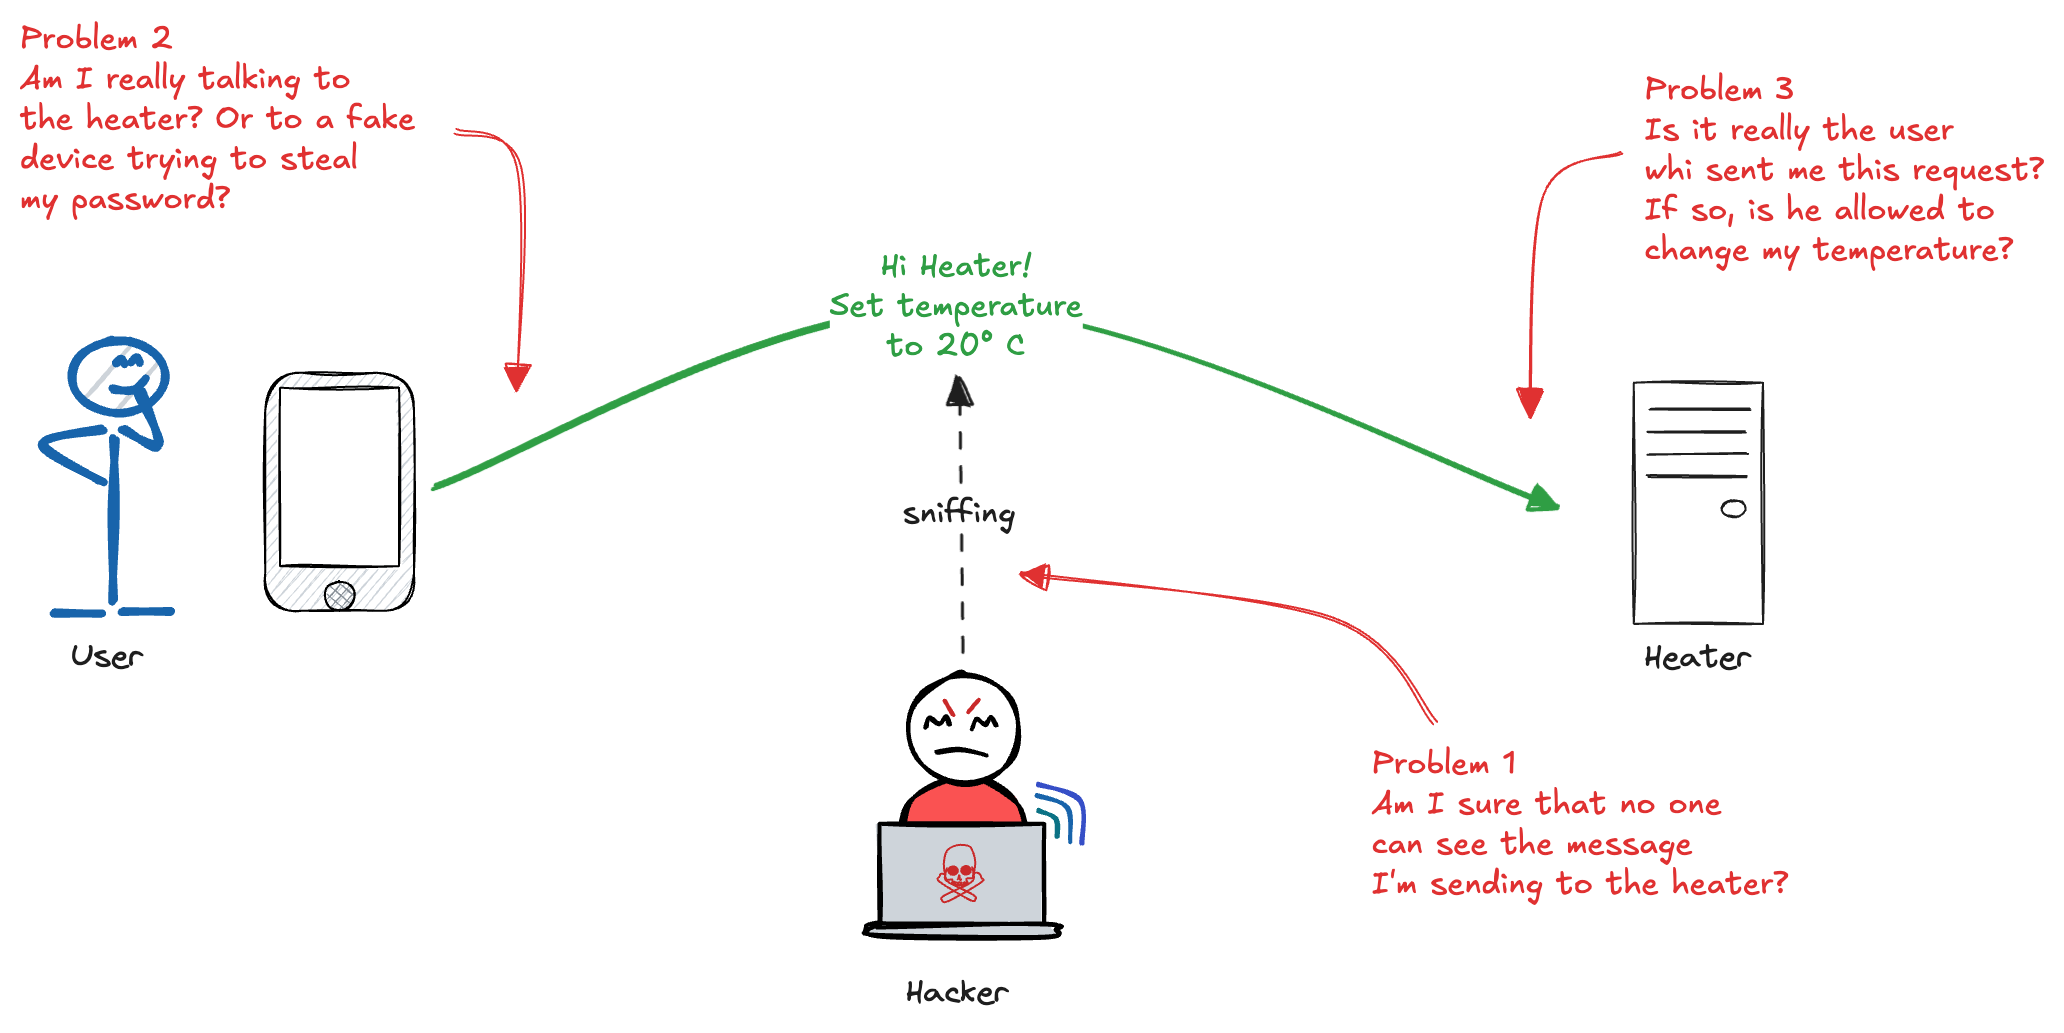

### Problem 1: Confidentiality

The first problem arises from the openness of the network itself. Whenever data is sent from a client device (like a mobile app) to a smart appliance, there is a** risk that the message could be intercepted in transit**. This is especially true if the communication is **not encrypted** or if secure channels like TLS are not properly configured. An attacker capable of **sniffing network packets** can eavesdrop on this communication, capturing sensitive commands or user data. The attacker might not even need to understand the full content of the message; simply knowing the structure or observing patterns might be enough to reconstruct behavior or launch further attacks. Therefore, ensuring **confidentiality** of the communication is the first challenge to address.

### Problem 2: authenticity

The second problem involves **authenticity**. From the user’s perspective, it is crucial **to be certain that the device they are interacting with is indeed the intended one**. If the system is vulnerable to **spoofing**, a malicious actor could pose as the heater and deceive the mobile app into sharing private data or accepting invalid responses. This sort of impersonation attack can lead to credential theft or unauthorized data collection. **Trust in the identity** of connected devices is therefore essential. This can be achieved through mechanisms such as mutual TLS authentication, public key infrastructure, or digital certificates that verify the origin of each endpoint.


### Problem 3: authorization

The third issue mirrors the second but from the opposite perspective. The device itself must be able to **verify that the request it receives genuinely comes from an authorized user**. In the heater example, it must ask whether the request actually came from Lena, and more importantly, whether Lena has permission to execute that specific action. This is the problem of **authorization**, where the system needs to enforce strict control over what operations each authenticated user is allowed to perform. Without proper checks, any user (or even any attacker who manages to forge a request) might be able to manipulate the heater, causing both comfort and security concerns.

Together, these three problems (confidentiality of the communication, authenticity of the devices, and authorization of the actions) form the triad of challenges that must be addressed in every secure WoT application. Only by systematically addressing each of these aspects can we ensure that WoT proxies behave as intended in complex, real-world environments.

### Encryption

At the heart of any secure system lies **encryption**. Without it, all other security mechanisms are ineffective. Any message sent over a network is **vulnerable to interception**. Attackers equipped with packet sniffers can capture unencrypted communications, gaining insight not only into the content of those messages but also into the structure and logic of the system itself. In such a case, even well-designed authentication and authorization layers can be undermined. Encryption is therefore not optional: it is the foundational requirement upon which every other security layer must be built.

There are two main types of encryption: symmetric and asymmetric. In **symmetric encryption**, both the sender and the receiver s**hare a single secret key**. This key is used to encode the message before transmission and to decode it upon receipt. The main advantage of this approach is performance,symmetric encryption algorithms are typically fast and require few computational resources, making them suitable for constrained devices. However, symmetric encryption introduces a significant challenge: **how to share the secret key securely** in the first place. If the key is exposed during this exchange, the security of the entire system collapses.

**Asymmetric encryption** offers a different model that avoids the key exchange problem. Instead of using a single key, it relies on **a pair of keys**: a **public key** and a **private key**. These keys are mathematically related, but knowledge of the public key does not allow an attacker to derive the private key. This allows **the public key to be freely distributed**, while t**he private key remains securely stored** on the device. When a mobile app wants to send a command to the heater, it encrypts the message using the heater’s public key. Once encrypted, the message becomes unintelligible to anyone except the heater, which can decrypt it using its own private key:

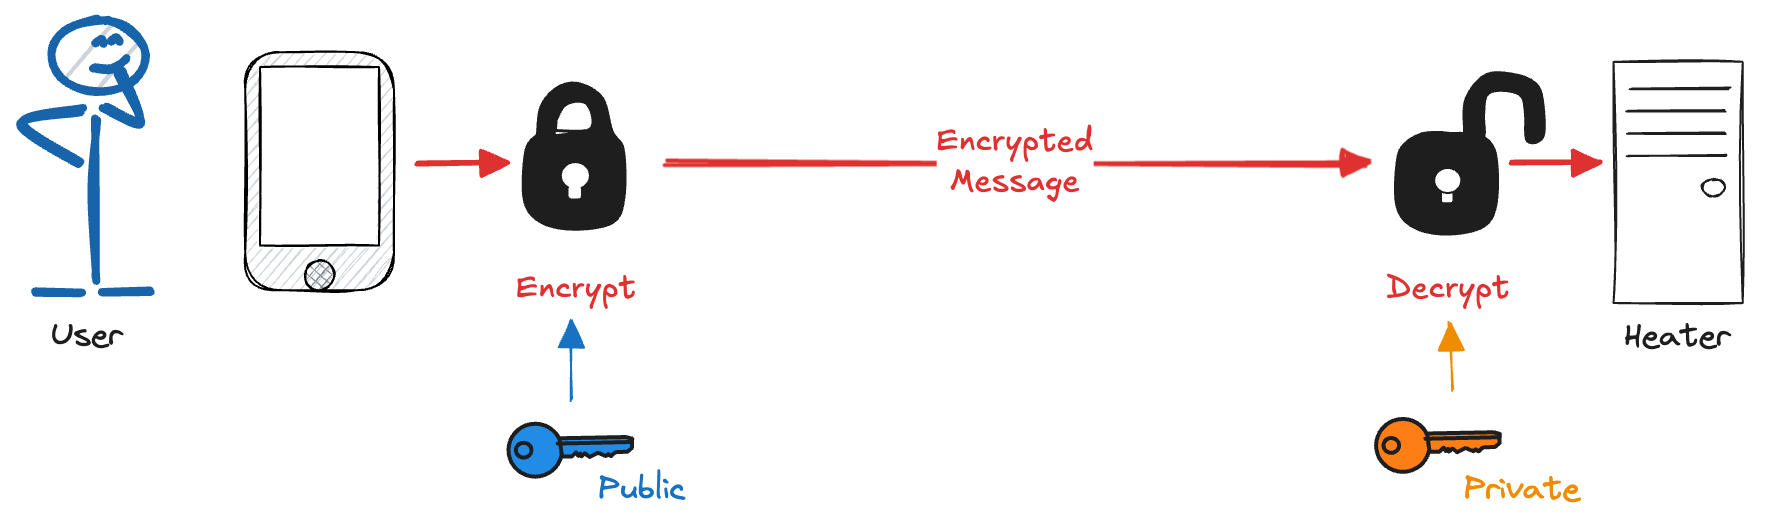

This model offers strong guarantees: even if an attacker intercepts the encrypted message in transit, they cannot decipher its content without access to the corresponding private key. In practice, most secure communications, such as those using **HTTPS**, combine both symmetric and asymmetric encryption. The asymmetric portion is used to securely exchange a temporary symmetric key, which is then used for the actual data transfer. This **hybrid approach** balances the performance benefits of symmetric encryption with the safety of public-key mechanisms.

## Transport Layer Security (TLS)

**Transport Layer Security (TLS)** is the protocol behind the "S" in HTTPS, and it ensures that communication between client and server remains private and secure. Before TLS became dominant, its predecessor Secure Socket Layer (SSL)was used extensively. However, **vulnerabilities** such as the infamous POODLE (Padding Oracle On Downgraded Legacy Encryption) attack led to the deprecation of SSL around 2014, and TLS has since become the standard for encrypted web traffic.

TLS plays two crucial roles in secure communication. The first is **authentication**: the protocol ensures that the client is genuinely communicating with the intended server, and not with an impersonator or a malicious intermediary. The second role is **encryption**: once the server’s identity has been verified, TLS guarantees that all data exchanged between client and server is encrypted. This means that even if an attacker intercepts the data packets, they will be unable to read or tamper with their content. Together, these two roles form the backbone of secure data exchange over the internet.

The process of establishing a secure TLS session involves a series of steps, typically referred to as the **TLS handshake**. It begins when the client contacts the server and declares the protocols and encryption algorithms it supports. This negotiation is conceptually similar to how clients and servers agree on content types during HTTP communication. The server then responds by sending its **digital certificat**e, which contains its public key. This certificate is issued and signed by a **trusted Certificate Authority (CA)**, allowing the client to verify the server’s identity against a list of known and trusted authorities. Once the client accepts the certificate as valid, it generates a session key, encrypts it using the server’s public key, and sends it back. Only the server can decrypt this key, because only it holds the corresponding private key. From this point forward, both client and server use the **shared session key** to encrypt and decrypt the messages exchanged during their session:

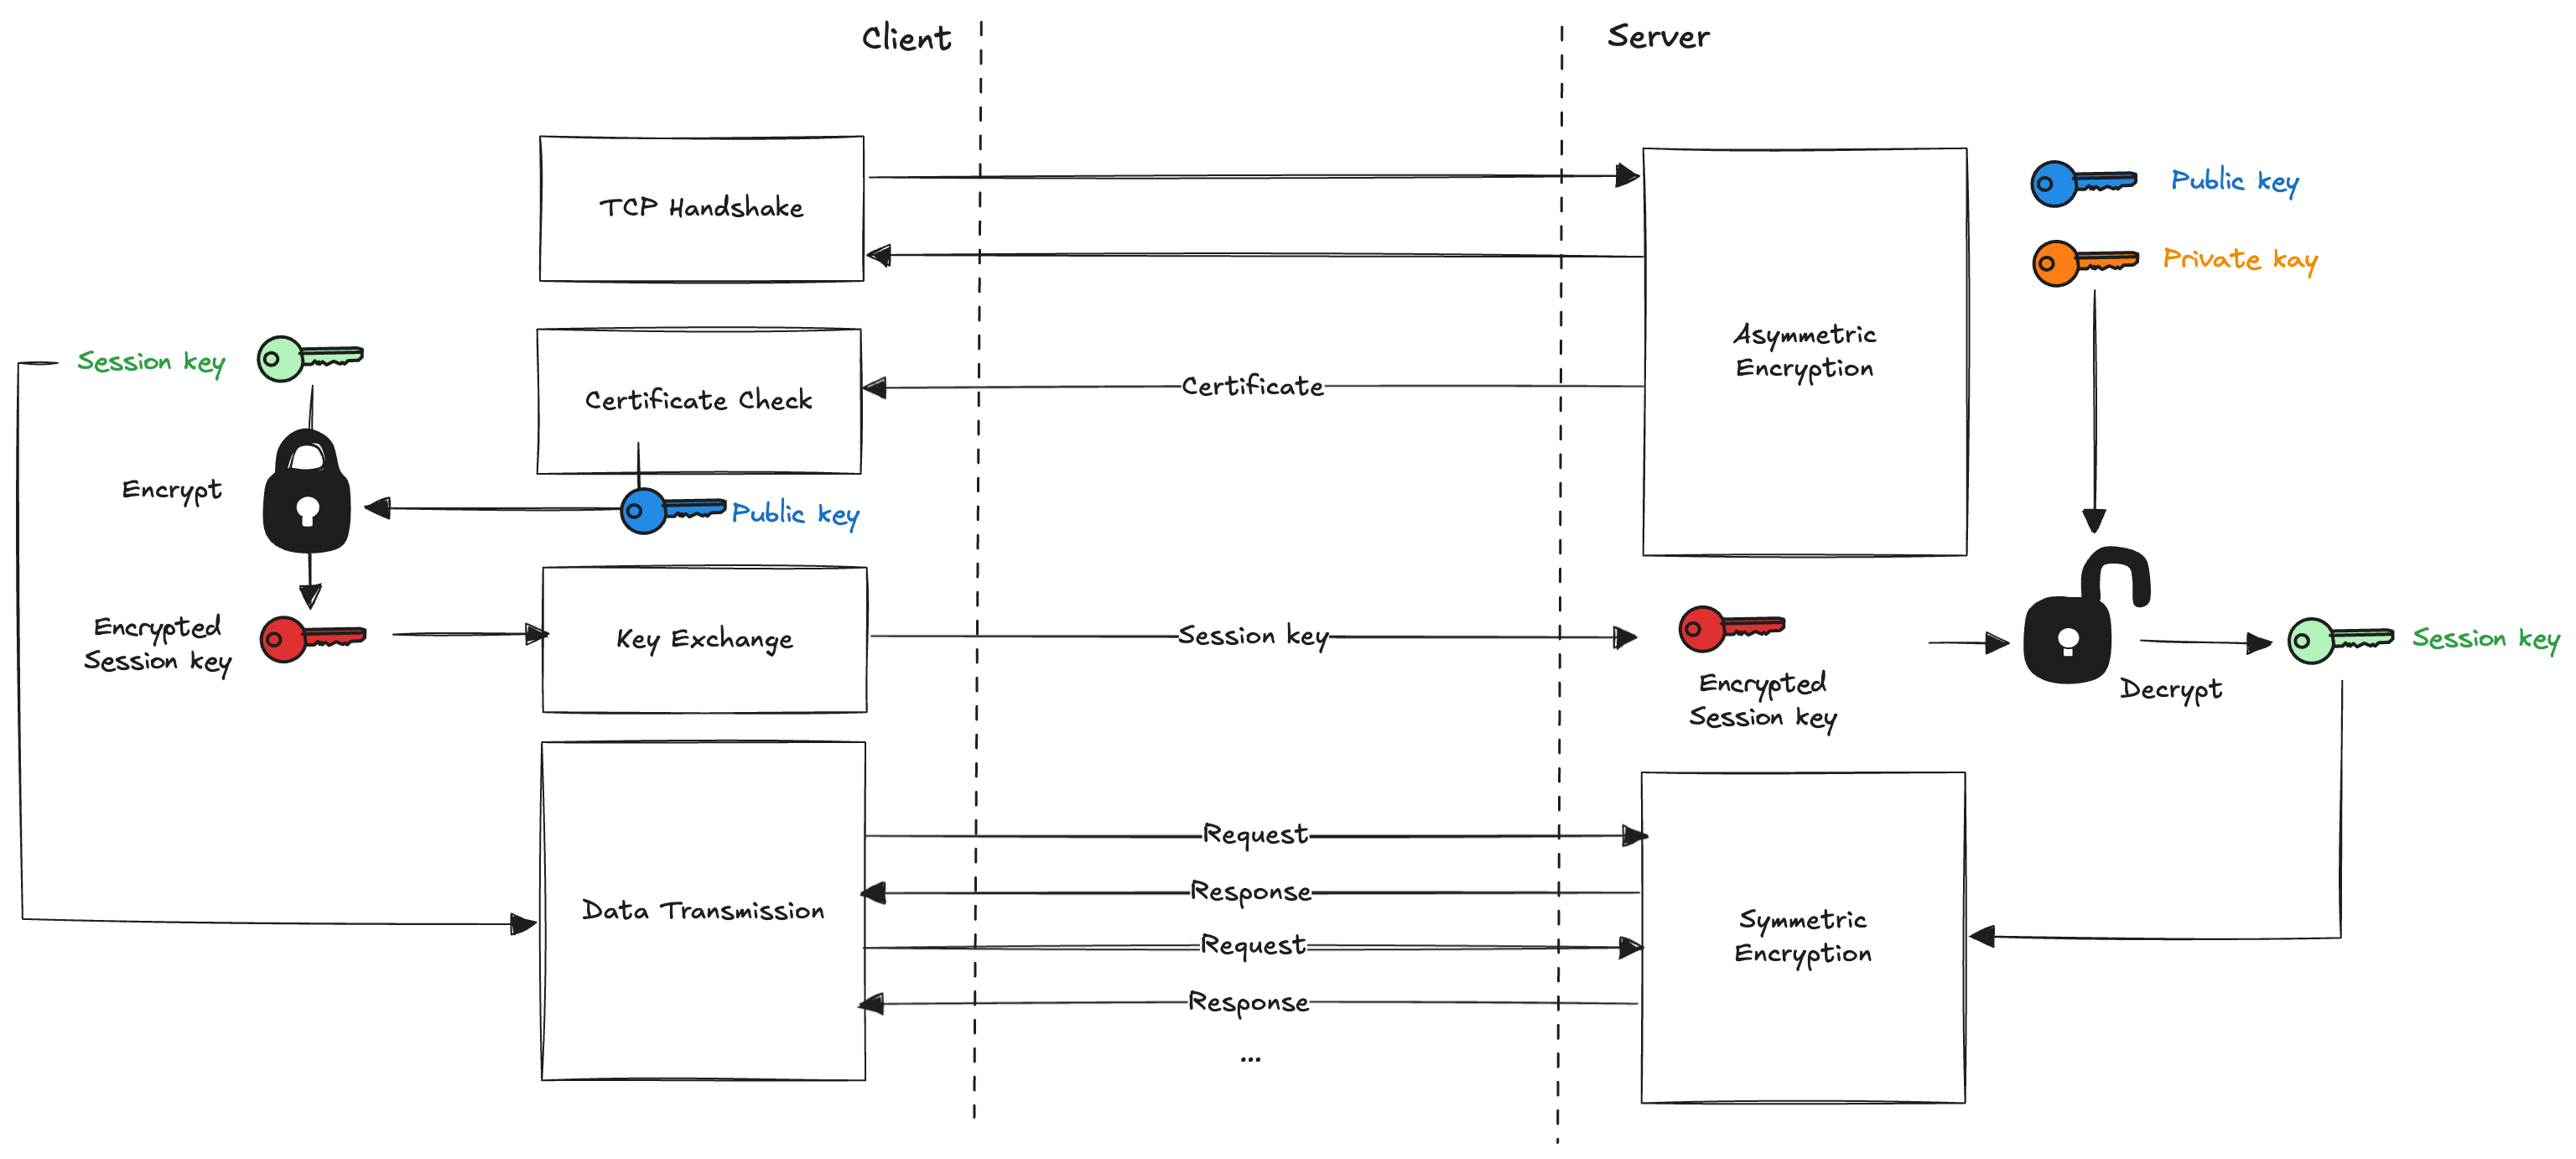

The success of this mechanism depends heavily on correct configuration and key management. In the context of a WoT proxy, using TLS means configuring our server to support HTTPS, generating and installing valid certificates, and ensuring that all API endpoints are exposed over secure connections only.

### Certificate

To generate a **certificate** we can use tool like the **OpenSSL command-line tool**. It allows us to create both the private key and the certificate that will be used by the server. The command typically used is:

In [ ]:
openssl req -x509 -newkey rsa:2048 -keyout privateKey.pem -out caCert.pem -days 1095 -sha256

This command creates a new **RSA key pair** (where RSA means Rivest-Shamir-Adleman, a widely used cryptosystem, based on the difficulty of factoring large composite numbers into their prime factors, which is computationally infeasible for sufficiently large key sizes) with a size of 2048 bits. The private key is saved in a file named **privateKey.pem**, which **must be kept secret**, as it allows the server to decrypt incoming messages and prove its identity. The certificate, saved in **caCert.pem**, contains the **public key** and **additional metadata**. It is signed using **SHA-256** (Secure Hash Algorithm 256-bit, a cryptographic hash function) and remains valid for 1095 days (approximately three years). During certificate creation, we will be prompted to enter details such as country, organization, and common name (typically the domain name of the server). These fields are embedded into the certificate and help identify it during the handshake phase.

Once these two files are created, the Node.js server can be configured to use them by importing the **https module** and reading the certificate files from disk. This replaces the standard http.createServer() call with https.createServer(), passing in the key and certificate as options. Let's modify the WoT Proxy code in order to  use HTTPS:

In [ ]:
// /server/http.js

const https = require('https');
const fs = require('fs');

// Read the certificate and the private key
const cert_file = './resources/caCert.pem'; // The certificate
const key_file = './resources/privateKey.pem'; // The private key
const passphrase = 'pippo';  // The password of the private key

const config = { key: fs.readFileSync(key_file), 
                 cert: fs.readFileSync(cert_file), 
                 passphrase: passphrase 
             };

const app = express();

app.use(bodyParser.json());

app.use('/iot/actuators', actuatorsRoutes);
app.use('/iot/sensors', sensorRoutes);
app.use('/iot/measurements', measurementRoutes);

app.get('/iot', function (req, res) { res.send('This is the WoT API!') });

app.use(converter());

// Create ther server using the certificate and the private key
const server = https.createServer(config, app);

module.exports = server;

The same approach applies to WebSocket servers, which must be upgraded to run over **WSS (WebSocket Secure)** rather than plain WS. These changes ensure that all communication to and from the server is encrypted using TLS. This is done just by passing to the WebSocket constructor the HTTPS server instance instead of the HTTP one. The WebSocket server will then automatically ihenherit the TLS configuration from the HTTPS server, ensuring that all WebSocket connections are also encrypted. 

### Authorities

After the server has been launched with HTTPS enabled, clients connecting to it will attempt to verify the certificate. Because the certificate is **self-signed** and not issued by a recognized **Certificate Authority**, clients will display a **warning**. This is expected behavior during local development and testing. It confirms that the server is correctly serving content over HTTPS, even though **it cannot be fully trusted** by the browser. While encryption ensures that data transmitted between devices remains confidential, it does not by itself guarantee the identity of the parties involved. This is the key limitation of self-signed certificates: although **they can encrypt data effectively, they do not establish trust**. In a secure communication system, trust must be rooted in verifiable identity. Without that verification, there is no assurance that the server a client connects to is truly the intended one. In other words, the **chain of trust** is broken.

This becomes a serious issue on the public Internet, where attackers can easily impersonate services and intercept traffic. For example, a malicious actor could pose as a WoT device, lure a user into initiating a connection, and then intercept sensitive information or manipulate device behavior. In such cases, even if the data is encrypted, the attacker could still cause harm simply by being mistaken for a legitimate device. This kind of impersonation cannot be prevented using self-signed certificates, because the client has no way to verify the origin of the certificate.

In contrast, certificates issued by trusted **Certificate Authorities (CAs)** provide a solution to this problem. CAs are organizations that validate the identity of entities and issue certificates that can be verified using a public trust infrastructure. When a browser or client connects to a server presenting a CA-issued certificate, **it checks whether the certificate was signed by a trusted authority**. If the signature is valid and the certificate matches the expected identity, the client proceeds with the connection. If not, it raises a warning or blocks the communication altogether. Obtaining a certificate from a trusted CA often involves a **verification process**, which can vary in rigor. Some well-known CAs (such as DigiCert, Sectigo, o GlobalSign)offer **paid services** where the applicant’s identity is verified before a certificate is issued. This verification may include domain ownership checks, organizational validation, or even manual review. However, the process is not free, and the cost can be prohibitive for small-scale projects or individual developers. The business of issuing certificates has, unfortunately, led to a market where not all authorities apply the same standards. Some low-cost CAs have been known to issue certificates with minimal validation, increasing the risk of misissued certificates and weakening the overall security model. This variability is why choosing a reputable CA is essential when deploying services to the public web. 

### Let’s Encrypt

To address the need for secure certificates that are freely available, [**Let’s Encrypt**](https://letsencrypt.org/) was established as a nonprofit initiative. It provides **domain-validated certificates at no cost**, helping **democratize access to HTTPS and TLS security**. Let’s Encrypt is supported by a broad coalition of major web actors and is now widely trusted by modern browsers. Through **automated tools** like **Certbot**, developers can request, install, and renew certificates with minimal effort, making it an ideal choice for securing the WoT Proxy in production. 

By using a CA-issued certificate from a reputable provider, developers ensure that their WoT proxies are both **encrypted** and **identifiable**. This enables clients to verify the identity of the server they are connecting to and builds the foundation for trust in the system.

## Authentication and Access Control

